                                       
## Quality of life data analysis ##

#### Dept : CSE
#### Div   : C
#### Team : 5
#### Team Id : 4CEDA_CP_07
#### Sem : 4
#### Problem statement : The problem statement is to analyse the raw data obtained from a rehabilitation centre, where a form consisting of 26 different questions is given to 86 patients to fill .Where the form consisting questions are from 4 different domains in which the patients need to be answered. Here our aim is to analyse the given data and calculate the quality of life of the patients and draw the proper inference.

#### Neeraj NK     :   01FE20BCS134   312                                                          
#### Anoop Patil    :  01FE20BCS138   315                                                    
#### Shreyas Joshi   : 01FE20BCS145   322                                                             
#### Kiran Patil    :  01FE20BCS151   328                                                         



**Team Leader : Shreyas Joshi    01FE20BCS145   322**


## Importing Necessary libraries

In [834]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [835]:
d1=pd.read_csv("WHOQOL.xlsx - D1.csv")
d2=pd.read_csv("WHOQOL.xlsx - D2.csv")
d3=pd.read_csv("WHOQOL.xlsx - D3.csv")
d4=pd.read_csv("WHOQOL.xlsx - D4.csv")

data = pd.read_csv(r'C:\Users\HP\EDA_Project\170-VIP-Camp-Patient-Details4.csv')
data
for i in data:
    print(i)

PID
Age
Education in year
Occupation
Annual Income
Marital Status
Living arrangement
Alcohol
AAO for alcohol in year
duration of use of alcohol
duration of excessive use of alcohol
avarage units used in last 30days
quantity of last drink
Reason for starting alcohol
Reasons for continued use of alcohol
Nicotine (yes/NO)
Quantity/day
Stressors
Motivation factor
Willingness for treatment
Unnamed: 20
Weight while admission (In Kg)
Weight while discharge (In Kg)
Height(In Ft)
Sugar(mg)
Withdrawal symptoms experienced when the patient stopped
Medical Problem experienced(Past )
Medical Problem experienced(Present)
Chronic health problem
Psychiatric complication_Past
Psychiatric complication_Present
Family history of alcoholism / drug abuse, if any (who and which type of drug)
If any SpecV(Who and which type of drug
Father Living Age
MotherLiving Age
Wife Living Age
Alcohol Dependence (Relationship type) Parents and Siblings
Spouse Monthly Income
Number of year of marriage
At what age did you 

In [913]:
med=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
med[['Medical Problem experienced(Present)','Chronic health problem','Details of Debts to be cleared. If any mention the amount']]

,Medical Problem experienced(Present),Chronic health problem,Details of Debts to be cleared. If any mention the amount
1,No,No,No
3,No,No,200000
4,No,No,40000
5,No,No,500000
8,No,No,200000
9,No,Diabetic,No
10,No,No,100000
11,Nerve related pains in extremities,No,300000
13,Bleeding piles,No,400000
14,Nerve related pains in extremities,HTN,No


# Data Preprocessing

## Patient ID 63's deatils are to be dropped as his ratings are not available

In [836]:
data.drop(62,axis='index',inplace=True)

## To remove empty columns


In [837]:
data.drop(data.iloc[:, 49:], inplace=True, axis=1)
data.drop('Unnamed: 20',axis='columns',inplace=True)

for i in data:
    print(i)

PID
Age
Education in year
Occupation
Annual Income
Marital Status
Living arrangement
Alcohol
AAO for alcohol in year
duration of use of alcohol
duration of excessive use of alcohol
avarage units used in last 30days
quantity of last drink
Reason for starting alcohol
Reasons for continued use of alcohol
Nicotine (yes/NO)
Quantity/day
Stressors
Motivation factor
Willingness for treatment
Weight while admission (In Kg)
Weight while discharge (In Kg)
Height(In Ft)
Sugar(mg)
Withdrawal symptoms experienced when the patient stopped
Medical Problem experienced(Past )
Medical Problem experienced(Present)
Chronic health problem
Psychiatric complication_Past
Psychiatric complication_Present
Family history of alcoholism / drug abuse, if any (who and which type of drug)
If any SpecV(Who and which type of drug
Father Living Age
MotherLiving Age
Wife Living Age
Alcohol Dependence (Relationship type) Parents and Siblings
Spouse Monthly Income
Number of year of marriage
At what age did you start workin

## Converting to numeric data


In [838]:

data.rename(columns={'avarage units used in last 30days': 'average units(in ml) used in last 30days', 'quantity of last drink':'quantity of last drink(in ml)', 'duration of excessive use of alcohol':'duration of excessive use of alcohol(in years)'}, inplace=True)
data['duration of use of alcohol'] = data['duration of use of alcohol'].astype(str)      
data['AAO for alcohol in year'] = data['AAO for alcohol in year'].astype(str) 
data['average units(in ml) used in last 30days'] = data['average units(in ml) used in last 30days'].astype(str)
data['quantity of last drink(in ml)'] = data['quantity of last drink(in ml)'].astype(str)
data['At what age did you start working?'] = data['At what age did you start working?'].astype(str)
data['Annual Income']=data['Annual Income'].astype(str)

data['Weight while admission (In Kg)']=data['Weight while admission (In Kg)'].astype(str)
data['Weight while discharge (In Kg)']=data['Weight while discharge (In Kg)'].astype(str)
data['Height(In Ft)']=data['Height(In Ft)'].astype(str)
data['Sugar(mg)']=data['Sugar(mg)'].astype(str)

data['Father Living Age']=data['Father Living Age'].astype(str)
data['MotherLiving Age']=data['MotherLiving Age'].astype(str)
data['Wife Living Age']=data['Wife Living Age'].astype(str)


data['Spouse Monthly Income']=data['Spouse Monthly Income'].astype(str)
data['Number of year of marriage']=data['Number of year of marriage'].astype(str)
#data['At what age did you start working?']=data['At what age did you start working?'].astype(str)
data['How long have you been working?']=data['How long have you been working?'].astype(str)
data['Details of Debts to be cleared. If any mention the amount']=data['Details of Debts to be cleared. If any mention the amount'].astype(str)
data['year of Education']=data['year of Education'].astype(str)


z=1
def preprocess(x):
    n=""
    for m in x:
        if m.isdigit() or m=='.':
            n=n+m
    if n.isdigit():
        return int(n)
    else:
         return x
data['duration of use of alcohol']=data.apply(lambda x: preprocess(x['duration of use of alcohol']),axis=1)
data['AAO for alcohol in year']=data.apply(lambda x: preprocess(x['AAO for alcohol in year']),axis=1)
data['average units(in ml) used in last 30days']=data.apply(lambda x: preprocess(x['average units(in ml) used in last 30days']),axis=1)
data['quantity of last drink(in ml)']=data.apply(lambda x: preprocess(x['quantity of last drink(in ml)']),axis=1)
data['At what age did you start working?']=data.apply(lambda x: preprocess(x['At what age did you start working?']),axis=1)
data['Annual Income']=data.apply(lambda x: preprocess(x['Annual Income']),axis=1)


data['Weight while admission (In Kg)']=data.apply(lambda x: preprocess(x['Weight while admission (In Kg)']),axis=1)
data['Weight while discharge (In Kg)']=data.apply(lambda x: preprocess(x['Weight while discharge (In Kg)']),axis=1)
data['Height(In Ft)']=data.apply(lambda x: preprocess(x['Height(In Ft)']),axis=1)
data['Sugar(mg)']=data.apply(lambda x: preprocess(x['Sugar(mg)']),axis=1)


data['Father Living Age']=data.apply(lambda x: preprocess(x['Father Living Age']),axis=1)
data['MotherLiving Age']=data.apply(lambda x: preprocess(x['MotherLiving Age']),axis=1)
data['Wife Living Age']=data.apply(lambda x: preprocess(x['Wife Living Age']),axis=1)

data['Spouse Monthly Income']=data.apply(lambda x: preprocess(x['Spouse Monthly Income']),axis=1)
data['Number of year of marriage']=data.apply(lambda x: preprocess(x['Number of year of marriage']),axis=1)
#data['At what age did you start working?']=data.apply(lambda x: preprocess(x['At what age did you start working?']),axis=1)
data['How long have you been working?']=data.apply(lambda x: preprocess(x['How long have you been working?']),axis=1)
data['Details of Debts to be cleared. If any mention the amount']=data.apply(lambda x: preprocess(x['Details of Debts to be cleared. If any mention the amount']),axis=1)
data['year of Education']=data.apply(lambda x: preprocess(x['year of Education']),axis=1)

## Converting duration of excessesive use of alcohol to same unit years

In [839]:
data['duration of excessive use of alcohol(in years)'] = data['duration of excessive use of alcohol(in years)'].astype(str)        
def preprocess_excessuseofalchohol(x):
    n=""
    if  x.__contains__('year') or  x.__contains__('Year') or  x.__contains__('Years'):
        for m in x:
            if m.isdigit() or m=='.':
                 n=n+m
        return n
    elif  x.__contains__('Days'):
        for m in x:
            if m.isdigit():
                 n=n+m
        
        return int(n)/365
    elif x.__contains__('Months') or  x.__contains__('Month'):
        for m in x:
            if m.isdigit():
                 n=n+m
        
        return int(n)/12
data['duration of excessive use of alcohol(in years)']=data.apply(lambda x: preprocess_excessuseofalchohol(x['duration of excessive use of alcohol(in years)']),axis=1)

## Adding required rows to dataframe

In [840]:
#Adding Raw Score column
d1["Raw Score"] = (d1.Q3) + (d1.Q4) + d1.Q10 + d1.Q15 + d1.Q16 + d1.Q17 + d1.Q18
d2["Raw Score"] = d2.Q5 + d2.Q6 + d2.Q7 + d2.Q11 + d2.Q19 + (d2.Q26)
d3["Raw Score"] = d3.Q20 + d3.Q21 + d3.Q22
d4["Raw Score"] = d4.Q8 + d4.Q9 + d4.Q12 + d4.Q13 + d4.Q14 + d4.Q23 + d4.Q24 + d4.Q25

In [841]:
def categoriseEd(x):
    if x=='3rd' or x=='5th' or x=='6th' or x=='7th':
        return 'Primary'
    elif x=='9th' or x=='8th' or x=='S.S.L.C':
        return 'Secondary'
    elif x=='PUC' or x=='PUC\nITI':   
        return 'PUC'
    elif x=='B.E, B.B.A' or x=='B.Tech' or x=='B.Com' or x=='B.A':
        return 'Graduate'
    elif x=='MBA' or x=='MSC':
        return 'Post Graduate'
    
data['EDCATEGORY']=data.apply(lambda x: categoriseEd(x['Education in year']),axis=1)

In [842]:
#Adding Transformed Score Column
d1["Transformed Scores"] = ((d1["Raw Score"]-7)/(35-7))*100
d2["Transformed Scores"] = ((d2["Raw Score"]-6)/(30-6))*100
d3["Transformed Scores"] = ((d3["Raw Score"]-3)/(15-3))*100   
d4["Transformed Scores"] = ((d4["Raw Score"]-8)/(40-8))*100   
pd.options.mode.chained_assignment = None

In [843]:
#Transformed score for married and unmarried patients
D1=d1[['PID', 'Transformed Scores']]
D1.rename(columns={'Transformed Scores':'DS1'}, inplace=True)


D2=d2[['Transformed Scores']]
D2.rename(columns={'Transformed Scores':'DS2'}, inplace=True)


ml = d3[d3['Q21'].notnull()]
ml = ml['PID'].tolist()
uml = d3[d3['Q21'].isnull()]
uml = uml['PID'].tolist()
def mldf(x):
    if x in ml:
        return True
    else:
        return False
mdf = d3[d3.apply(lambda x: mldf(x['PID']), axis=1)]
m=mdf[['PID','Transformed Scores']]

NS=d3[['PID','Q20', 'Q22']]
NS['Raw Score'] = NS.Q20+NS.Q22
NS['Transformed Scores'] =((NS['Raw Score']-2)/(10-2))*100
def umldf(x):
    if x in uml:
        return True
    else:
        return False
umdf = NS[NS.apply(lambda x: umldf(x['PID']), axis=1)]
u=umdf[['PID','Transformed Scores']]

cnct=pd.concat([u, m])

correct = cnct.sort_values(by='PID')


D4=d4[['Transformed Scores']]
D4.rename(columns={'Transformed Scores':'DS4'}, inplace=True)

D3 = correct[['Transformed Scores']]
D3.rename(columns={'Transformed Scores':'DS3'}, inplace=True)

qd = pd.concat([D1, D2, D3, D4], axis=1)
qd

,PID,DS1,DS2,DS3,DS4
0,1,50.000000,70.833333,50.000000,84.375
1,2,53.571429,54.166667,50.000000,75.000
2,3,28.571429,33.333333,0.000000,65.625
3,4,35.714286,33.333333,50.000000,75.000
4,5,50.000000,29.166667,50.000000,56.250
...,...,...,...,...,...
81,83,53.571429,33.333333,58.333333,62.500
82,84,50.000000,54.166667,50.000000,56.250
83,85,42.857143,29.166667,75.000000,71.875
84,86,42.857143,37.500000,33.333333,65.625


## Making class variable(verdict) of 86 patients

In [844]:
qd['SUM_DS']=qd.DS1+qd.DS2+qd.DS3+qd.DS4
qd['ODS']=(qd['SUM_DS']/400)*100

def assignClass(x):
    if x>=0 and x<=20:
        return 'Very poor'
    elif x>20 and x<=40:
        return 'Poor'
    elif x>40 and x<=60:
        return 'Neither poor nor good'
    elif x>60 and x<=80:
        return 'Good'
    elif x>80 and x<=100:
        return 'Very good'
qd['Verdict']=qd.apply(lambda x: assignClass(x['ODS']), axis=1 )
qd

,PID,DS1,DS2,DS3,DS4,SUM_DS,ODS,Verdict
0,1,50.000000,70.833333,50.000000,84.375,255.208333,63.802083,Good
1,2,53.571429,54.166667,50.000000,75.000,232.738095,58.184524,Neither poor nor good
2,3,28.571429,33.333333,0.000000,65.625,127.529762,31.882440,Poor
3,4,35.714286,33.333333,50.000000,75.000,194.047619,48.511905,Neither poor nor good
4,5,50.000000,29.166667,50.000000,56.250,185.416667,46.354167,Neither poor nor good
...,...,...,...,...,...,...,...,...
81,83,53.571429,33.333333,58.333333,62.500,207.738095,51.934524,Neither poor nor good
82,84,50.000000,54.166667,50.000000,56.250,210.416667,52.604167,Neither poor nor good
83,85,42.857143,29.166667,75.000000,71.875,218.898810,54.724702,Neither poor nor good
84,86,42.857143,37.500000,33.333333,65.625,179.315476,44.828869,Neither poor nor good


## Distribution of patients in in each class level

In [845]:
qd.groupby('Verdict').count()['PID']

Verdict
Good                     22
Neither poor nor good    55
Poor                      8
Very good                 1
Name: PID, dtype: int64

In [846]:
dv.corr()

,PID,DS1,DS2,DS3,DS4,SUM_DS,ODS,Verdict,V1,V2,V3,V4
PID,1.000000,0.105329,-0.055144,0.098214,-0.081879,0.029334,0.029334,-0.016507,0.141504,-0.033554,0.072819,-0.108398
DS1,0.105329,1.000000,0.416839,0.364777,0.319729,0.682955,0.682955,0.617992,0.896008,0.384196,0.305992,0.239603
DS2,-0.055144,0.416839,1.000000,0.286905,0.373528,0.744435,0.744435,0.649213,0.433966,0.953329,0.267098,0.396324
DS3,0.098214,0.364777,0.286905,1.000000,0.392039,0.764780,0.764780,0.655339,0.352368,0.300056,0.953138,0.332605
DS4,-0.081879,0.319729,0.373528,0.392039,1.000000,0.666402,0.666402,0.577363,0.343842,0.369306,0.370571,0.887580
SUM_DS,0.029334,0.682955,0.744435,0.764780,0.666402,1.000000,1.000000,0.871878,0.662631,0.721460,0.714414,0.599295
ODS,0.029334,0.682955,0.744435,0.764780,0.666402,1.000000,1.000000,0.871878,0.662631,0.721460,0.714414,0.599295
Verdict,-0.016507,0.617992,0.649213,0.655339,0.577363,0.871878,0.871878,1.000000,0.598020,0.632419,0.608354,0.534837
V1,0.141504,0.896008,0.433966,0.352368,0.343842,0.662631,0.662631,0.598020,1.000000,0.439702,0.287667,0.290782
V2,-0.033554,0.384196,0.953329,0.300056,0.369306,0.721460,0.721460,0.632419,0.439702,1.000000,0.282859,0.404363


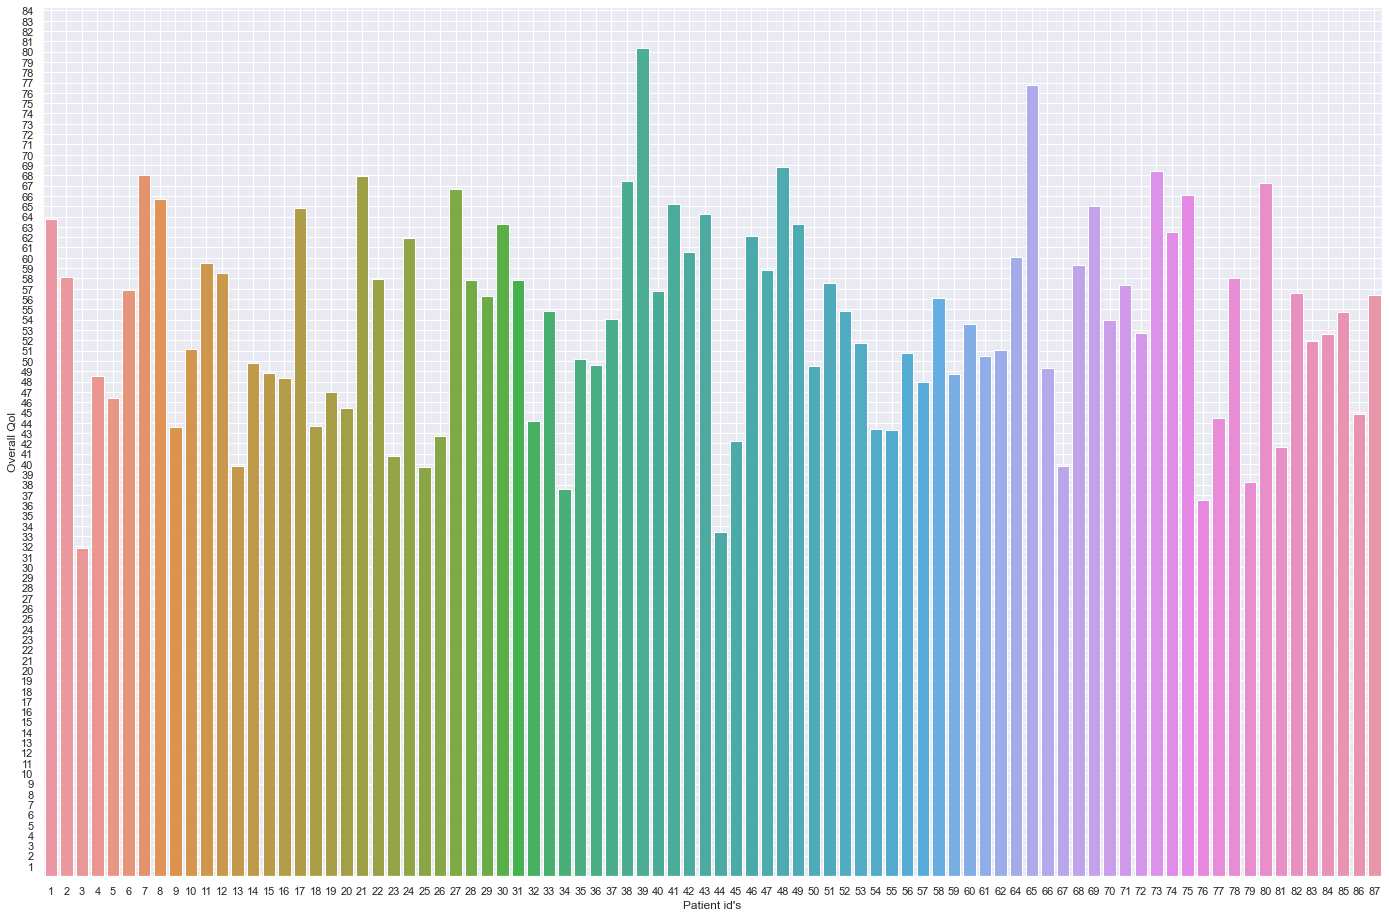

In [847]:
plt.figure(figsize=(24,16))
x = qd['PID'].tolist()
plt.xticks(x)
y = qd['ODS'].tolist()
plt.yticks(range(1,100))
sns.barplot(x=x,y=y)
# plt.bar(x, y)
plt.grid(axis='x')
plt.xlabel("Patient id's")
plt.ylabel("Overall Qol")
plt.show()

In [848]:
#next q wise response in each domain
qd['ODS'].mean() #Average Qol of 86 Patients

53.94777823920268

In [849]:
def spidpoor(x):
    if x in poorlist:
        return True
    else:
        return False
def spidgood(x):
    if x in goodlist:
        return True
    else:
        return False

def spidnpg(x):
    if x in npglist:
        return True
    else:
        return False


In [850]:
dg=qd[qd['Verdict']=='Good']
goodlist=dg['PID'].tolist()

dnpg=qd[qd['Verdict']=='Neither poor nor good']
npglist=dnpg['PID'].tolist()

dp=qd[qd['Verdict']=='Poor']
poorlist=dp['PID'].tolist()

# def marunmarried(x):
    
#poorlist
mdud=d3[d3['Q21'].isna()]
mdudl=mdud['PID'].tolist()
count=0
def dgwd(x):
    global count
    if x in npglist and x in mdudl:
        count+=1
qd.apply(lambda x: dgwd(x['PID']) ,axis=1)
count
# npglist

18

In [851]:
dv = qd

dv
dv['V1']=dv.apply(lambda x: assignClass(x['DS1']),axis=1)
dv['V2']=dv.apply(lambda x: assignClass(x['DS2']),axis=1)
dv['V3']=dv.apply(lambda x: assignClass(x['DS3']),axis=1)
dv['V4']=dv.apply(lambda x: assignClass(x['DS4']),axis=1)
def verdict_encoding(x):
    if x=='Very poor':
        return 1
    elif x=='Poor':
        return 2
    elif x=='Neither poor nor good':
        return 3
    elif x=='Good':
        return 4
    elif x=='Very good':
        return 5
    
dv['V1']=dv.apply(lambda x: verdict_encoding(x['V1']),axis=1)
dv['V2']=dv.apply(lambda x: verdict_encoding(x['V2']),axis=1)
dv['V3']=dv.apply(lambda x: verdict_encoding(x['V3']),axis=1)
dv['V4']=dv.apply(lambda x: verdict_encoding(x['V4']),axis=1)
dv['Verdict']=dv.apply(lambda x:verdict_encoding(x['Verdict']),axis=1)
dven=dv

In [852]:
d1

,PID,Q3,Q4,Q10,Q15,Q16,Q17,Q18,Raw Score,Transformed Scores
0,1,1,1,4,5,4,3,3,21,50.000000
1,2,2,2,2,4,4,4,4,22,53.571429
2,3,3,3,2,2,1,2,2,15,28.571429
3,4,4,3,3,1,1,3,2,17,35.714286
4,5,3,3,2,4,2,4,3,21,50.000000
...,...,...,...,...,...,...,...,...,...,...
81,83,2,2,4,5,1,4,4,22,53.571429
82,84,1,1,3,5,4,4,3,21,50.000000
83,85,2,2,2,4,2,4,3,19,42.857143
84,86,2,2,4,2,1,4,4,19,42.857143


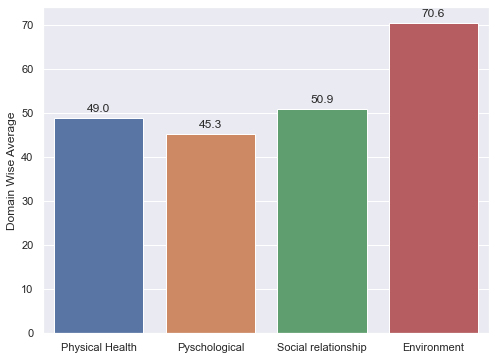

In [853]:
#Domain wise average of 86 patients
qdavg=[qd['DS1'].mean(), qd['DS2'].mean(), qd['DS3'].mean(), qd['DS4'].mean()]
qdnames=['Physical Health','Pyschological','Social relationship','Environment']
plt.figure(figsize=(8, 6))
splot=sns.barplot(x=qdnames, y=qdavg)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel('Domain Wise Average')
plt.show()

## Deriving quantity of ethonol consumed based on type of alcohol

In [854]:
def alcholtype(x):
    if x=='Any type' or x=='Choice':
        return 'Wiskey'
    else:
        return x
data['Alcohol']=data.apply(lambda x: alcholtype(x['Alcohol']),axis=1)

In [855]:
def calrisklevel(x):
    if x=='B.P':
        return 0.789*43
    elif x=='Beer':
        return 0.789*6
    elif x=='8 P.M':
        return 0.789*43
    elif x=='Cocktail':
        return 0.789*30
    elif x=='DSP Black':
        return 0.789*43
    elif x=='Gin':
        return 0.789*37.5
    elif x=='Hywords':
        return 0.789*5.5
    elif x=='M H':
        return 0.789*43
    elif x=='M.C':
        return 0.789*43
    elif x=='ML':
        return 0.789*43
    elif x=='O.C':
        return 0.789*43
    elif x=='O.T':
        return 0.789*43
    elif x=='Royal':
        return 0.789*43
    elif x=='Wiskey':
        return 0.789*45
    

    
data['Risk_level']=data.apply(lambda x: calrisklevel(x['Alcohol']),axis=1)
data['Risk_level']=data['Risk_level']*data['average units(in ml) used in last 30days']
data['Risk_level']=data['Risk_level']/1000


In [856]:
def categoriserisklevel(x):
    if x>=0 and x<=15:
        return 'Low Risk'
    elif x>15 and x<=30:
        return 'Medium Risk'
    elif x>30:
        return 'High Risk'


data['Risk_level']=data.apply(lambda x: categoriserisklevel(x['Risk_level']),axis=1)


In [857]:
data['Risk_level']

0       High Risk
1     Medium Risk
2       High Risk
3        Low Risk
4     Medium Risk
         ...     
82       Low Risk
83       Low Risk
84       Low Risk
85       Low Risk
86       Low Risk
Name: Risk_level, Length: 86, dtype: object

In [858]:
data.groupby('Risk_level').count()

,PID,Age,Education in year,Occupation,Annual Income,Marital Status,Living arrangement,Alcohol,AAO for alcohol in year,duration of use of alcohol,...,How long have you been working?,Details of Debts to be cleared. If any mention the amount,Legal complications yes/no,Describe your childhood / teenage year? Did you experience the following,Behaviour problem identified in Childhood/ Adolescence,Achievements in the Education,year of Education,Past Treatment History,Psychological factors of substances use continuation and relapse,EDCATEGORY
Risk_level,,,,,,,,,,,,,,,,,,,,,
High Risk,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Low Risk,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
Medium Risk,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


## Based on ethonol content 42  have low risk 32 have medium risk and 12 have high risk

In [859]:
data['At what age did you start working?']

0     18
1     18
2     18
3     15
4     15
      ..
82    16
83    16
84    16
85    16
86    18
Name: At what age did you start working?, Length: 86, dtype: object

## Poor Patients

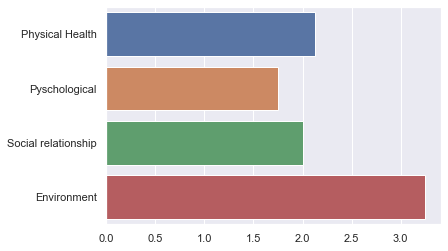

In [860]:
w=dv[dv.apply(lambda x: spidpoor(x['PID']),axis=1)]
x=[w['V1'].sum()/8, w['V2'].sum()/8, w['V3'].sum()/8,  w['V4'].sum()/8]
qdnames=['Physical Health','Pyschological','Social relationship','Environment']

sns.barplot(x=x, y=qdnames)
plt.show()

## From the above graph we can observe that physological domain has least score which is neither poor nor good.

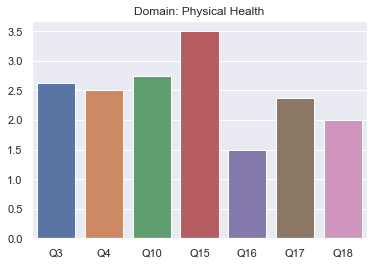

Insomnia affects sleep


In [861]:
#physical health domain

#datapoorh[['PID','Willingness for treatment','Age','AAO for alcohol in year','duration of use of alcohol','duration of excessive use of alcohol(in years)','average units(in ml) used in last 30days','quantity of last drink(in ml)','Nicotine (yes/NO)','smoking/smokeless','Withdrawal symptoms experienced when the patient stopped','Medical Problem experienced(Past )','Medical Problem experienced(Present)','Chronic health problem','At what age did you start working?']]
datapoorh=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]

w=d1[d1.apply(lambda x: spidpoor(x['PID']),axis=1)]
y=[w['Q3'].sum()/8, w['Q4'].sum()/8, w['Q10'].sum()/8,  w['Q15'].sum()/8,  w['Q16'].sum()/8,  w['Q17'].sum()/8,  w['Q18'].sum()/8]
x=['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18']

sns.barplot(x=x, y=y).set(title='Domain: Physical Health')
plt.show()
#datapoorh[['PID','Willingness for treatment','Age','AAO for alcohol in year','duration of use of alcohol','duration of excessive use of alcohol(in years)','average units(in ml) used in last 30days','quantity of last drink(in ml)','Nicotine (yes/NO)','smoking/smokeless','Withdrawal symptoms experienced when the patient stopped','Medical Problem experienced(Past )','Medical Problem experienced(Present)','Chronic health problem','At what age did you start working?']]
#Q16.How satisfied are you with your sleep?
#datapoorh[['PID','Willingness for treatment','Age','AAO for alcohol in year','duration of use of alcohol','duration of excessive use of alcohol(in years)','average units(in ml) used in last 30days','quantity of last drink(in ml)','Nicotine (yes/NO)','Withdrawal symptoms experienced when the patient stopped','Medical Problem experienced(Past )','Medical Problem experienced(Present)','Chronic health problem','At what age did you start working?']]
#datapoorh[['Medical Problem experienced(Past )', 'Medical Problem experienced(Present)']]
print("Insomnia affects sleep")
# print("For sleep see above risklevel sleep related risk level")

## Age poor qol of patients

In [862]:
#x=['21-30','31-40','41-50','51-60','61-70']
pdict={}
gdict={}
ngpdict={}
vgdict={}
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
i=0
j=0
l=0
m=0
n=0
o=0
p=0
q=0
def dictages(x,x2):
    global pdict,gdict,ngpdict ,a,b,c,d,e,f,g,h,i,j,l,m,n,o,p,q
    if x>=21 and x<=30:
        if x2==2:
            a+=1
            pdict['21-30']=a
        elif x2==3:
            b+=1
            ngpdict['21-30']=b
        elif x2==4:
            c+=1
            gdict['21-30']=c
        elif x2==5:
            d+=1
            vgdict['21-30']=d
        
    elif x>=31 and x<=40:
        if x2==2:
            e+=1
            pdict['31-40']=e
        elif x2==3:
            f+=1
            ngpdict['31-40']=f
        elif x2==4:
            g+=1
            gdict['31-40']=g
            
        
    elif x>=41 and x<=50:
        if x2==2:
            h+=1
            pdict['41-50']=h
        elif x2==3:
            i+=1
            ngpdict['41-50']=i
        elif x2==4:
            j+=1
            gdict['41-50']=j
            

    elif x>=51 and x<=60:
        if x2==2:
            l+=1
            pdict['51-60']=l
        elif x2==3:
            m+=1
            ngpdict['51-60']=m
        elif x2==4:
            n+=1
            gdict['51-60']=n
            
        
    elif x>=61 and x<=70:
        if x2==2:
            o+=1
            pdict['61-70']=o
        elif x2==3:
            p+=1
            ngpdict['61-70']=p
        elif x2==4:
            q+=1
            gdict['61-70']=q
            
datapoorh.apply(lambda x: dictages(x['Age'],2), axis=1)
pdict

#gdict
# # ngpdict
# # vgdict

{'41-50': 4, '51-60': 2, '31-40': 2}

<AxesSubplot:>

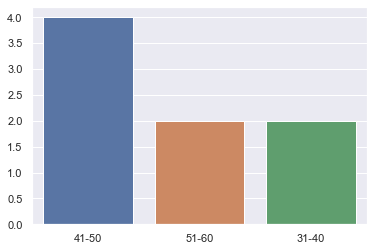

In [863]:
def choosedict(z):
    x=[]
    y=[]
    for key in z:
        x.append(key)
        y.append(z[key])
    return x,y
     


x=choosedict(pdict)[0]
y=choosedict(pdict)[1]
sns.barplot(x=x,y=y)

## Out of 8 patients 75% of them are above age of 41 which means they have responsibilities to handle and hence their phyocology is less.

In [864]:

def convertages(x):
    if x>=12 and x<=20:
        return '12-20'
    elif x>=21 and x<=30:
        return '21-30'
    elif x>=31 and x<=40:
        return '31-40'
    elif x>=41 and x<=50:
        return '41-50'
    elif x>=51 and x<=60:
        return '51-60'
    elif x>=61 and x<=70:
        return '61-70'
    
datapoorh['AAOAGES']=datapoorh.apply(lambda x: convertages(x['AAO for alcohol in year']),axis=1)


[Text(0.5, 1.0, 'Age when started drinking alcohol')]

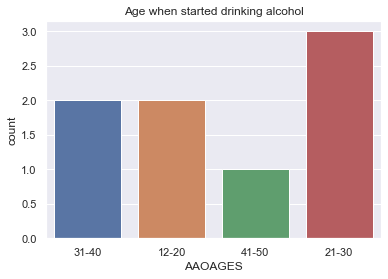

In [865]:
datapoorh
sns.countplot(data=datapoorh,x='AAOAGES').set(title='Age when started drinking alcohol')


## WE can observe that 3 people started drinking at age of 21 to 30 which is 37.5% and 2 started at age of 12-20(early young age) which is 25%. 

In [866]:
print(datapoorh.groupby('Reason for starting alcohol').count()['PID'])



Reason for starting alcohol
Someone in family or friends were using                                           6
Someone in family or friends were using, To feel better and confident or happy    1
To avoid problems and sadness                                                     1
Name: PID, dtype: int64


In [867]:
# datapoorh['Family history of alcoholism / drug abuse, if any (who and which type of drug)']
# datapoorh['If any SpecV(Who and which type of drug']
# datapoorh['Alcohol Dependence (Relationship type) Parents and Siblings']
dv.corr()

,PID,DS1,DS2,DS3,DS4,SUM_DS,ODS,Verdict,V1,V2,V3,V4
PID,1.000000,0.105329,-0.055144,0.098214,-0.081879,0.029334,0.029334,-0.016507,0.141504,-0.033554,0.072819,-0.108398
DS1,0.105329,1.000000,0.416839,0.364777,0.319729,0.682955,0.682955,0.617992,0.896008,0.384196,0.305992,0.239603
DS2,-0.055144,0.416839,1.000000,0.286905,0.373528,0.744435,0.744435,0.649213,0.433966,0.953329,0.267098,0.396324
DS3,0.098214,0.364777,0.286905,1.000000,0.392039,0.764780,0.764780,0.655339,0.352368,0.300056,0.953138,0.332605
DS4,-0.081879,0.319729,0.373528,0.392039,1.000000,0.666402,0.666402,0.577363,0.343842,0.369306,0.370571,0.887580
SUM_DS,0.029334,0.682955,0.744435,0.764780,0.666402,1.000000,1.000000,0.871878,0.662631,0.721460,0.714414,0.599295
ODS,0.029334,0.682955,0.744435,0.764780,0.666402,1.000000,1.000000,0.871878,0.662631,0.721460,0.714414,0.599295
Verdict,-0.016507,0.617992,0.649213,0.655339,0.577363,0.871878,0.871878,1.000000,0.598020,0.632419,0.608354,0.534837
V1,0.141504,0.896008,0.433966,0.352368,0.343842,0.662631,0.662631,0.598020,1.000000,0.439702,0.287667,0.290782
V2,-0.033554,0.384196,0.953329,0.300056,0.369306,0.721460,0.721460,0.632419,0.439702,1.000000,0.282859,0.404363


In [868]:
# datapoorh['Medical Problem experienced(Past )']
# datapoorh['Medical Problem experienced(Present)']

In [869]:

# datapoorh['Psychiatric complication_Past']
# datapoorh['Psychiatric complication_Present']

## Among 8 people 6 patients started drinking alcohol by influence of their family.Which means majorty of them were due to their family.

In [870]:
# for i in datapoorh:
#     print(i)
z=datapoorh['duration of excessive use of alcohol(in years)'].tolist()
datapoorh['duration of excessive use of alcohol(in years)']=datapoorh['duration of excessive use of alcohol(in years)'].astype(float)
datapoorh['duration of excessive use of alcohol(in years)'].mean()


3.75

<AxesSubplot:xlabel='At what age did youstartworking?', ylabel='count'>

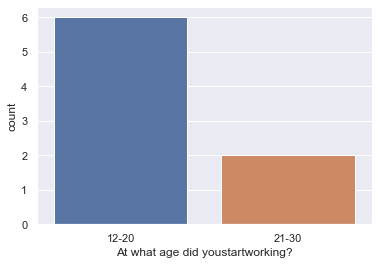

In [871]:
datapoorh['At what age did youstartworking?']=datapoorh.apply(lambda x: convertages(x['At what age did you start working?']),axis=1)

sns.countplot(data=datapoorh,x='At what age did youstartworking?')
#datapoorh['At what age did you start working?']



In [872]:
datapoorh['Describe your childhood / teenage year? Did you experience the following']


2                        None
12    Poverty or severe debts
24                       None
33                       None
43                       None
66                       None
75                       None
78    Poverty or severe debts
Name: Describe your childhood / teenage year? Did you experience the following, dtype: object

## Out of 8 popeple 25% are poor financially so started working at early ages

In [873]:
datapoorh.groupby('Education in year').count()['PID']
#sns.countplot(data=datapoorh,x='Education in year')


Education in year
5th        2
9th        1
B.Com      1
PUC        2
S.S.L.C    2
Name: PID, dtype: int64

In [874]:

datapoorh['How long have you been working?']=datapoorh['How long have you been working?'].astype(int)
datapoorh['How long have you been working?'].mean()

24.75

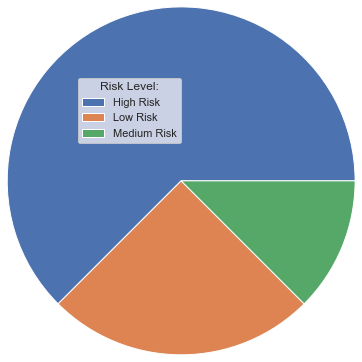

In [875]:
#Q16)Ethenol affecting sleep
riskdf=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
rislists=riskdf['Risk_level'].tolist()
rislists


values=[5,2,1]
labels=['High Risk','Low Risk','Medium Risk']
plt.pie(values, radius=2)
plt.legend(labels=labels, title='Risk Level:',loc='upper left')
plt.show() 


In [876]:
datapoorh.groupby('Occupation').count()['PID']
datapoorh['Motivation factor']

2         Mild
12    Moderate
24    Moderate
33    Moderate
43      Severe
66    Moderate
75        Mild
78      Severe
Name: Motivation factor, dtype: object

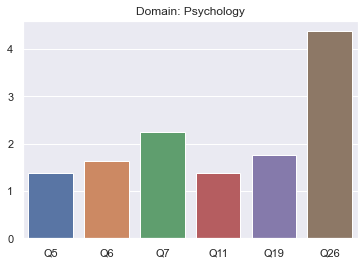

In [877]:
#psychological domain
datapoorpyscho=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
#datapoorpyscho[['PID','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse','Significant Psychosocial problems']]
w=d2[d2.apply(lambda x: spidpoor(x['PID']),axis=1)]
y=[w['Q5'].sum()/8, w['Q6'].sum()/8, w['Q7'].sum()/8,  w['Q11'].sum()/8,  w['Q19'].sum()/8,  w['Q26'].sum()/8]
x=['Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26']
sns.barplot(x=x, y=y).set(title='Domain: Psychology')
plt.show()
#datapoorpyscho[['PID','Details of Debts to be cleared. If any mention the amount','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse']]


<AxesSubplot:>

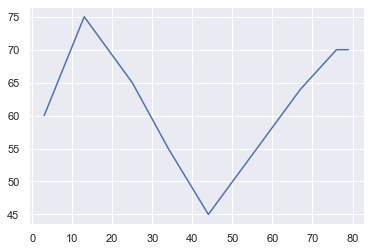

In [878]:
#Q11)Are you able to accept your bodily appearance?

weightp=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
pidw=weightp[['PID','Weight while admission (In Kg)']]
x=pidw['PID'].tolist()
y=pidw['Weight while admission (In Kg)'].tolist()
sns.lineplot(x=x,y=y)

# weightp['Height(In Ft)'].mean()



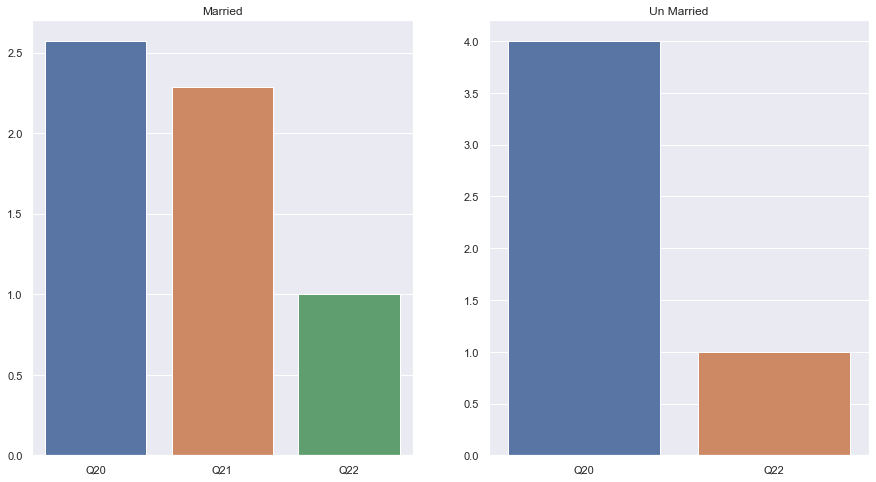

In [879]:
#social relationship domain
datapoorsocialr=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ml = d3[d3['Q21'].notnull()]
ml = ml['PID'].tolist()
def mldf(x):
    if x in ml:
        return True
    else:
        return False
mpdf = d3[d3.apply(lambda x: mldf(x['PID']), axis=1)]
m=mpdf
mid=m[m.apply(lambda x: spidpoor(x['PID']),axis=1)]


uml = d3[d3['Q21'].isnull()]
uml = uml['PID'].tolist()
def umldf(x):
    if x in uml:
        return True
    else:
        return False
umpdf = d3[d3.apply(lambda x: umldf(x['PID']), axis=1)]
u=umpdf
umid=u[u.apply(lambda x: spidpoor(x['PID']),axis=1)]


y=[mid['Q20'].sum()/7, mid['Q21'].sum()/7, mid['Q22'].sum()/7]
x=['Q20','Q21','Q22']
sns.barplot(x=x,y=y,ax=axes[0]).set(title='Married')
y=[umid['Q20'].sum(), umid['Q22'].sum()]
x=['Q20','Q22']
sns.barplot(x=x,y=y,ax=axes[1]).set(title='Un Married')
plt.show()
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]


In [880]:
oth=data[data.apply(lambda x:spidpoor(x['PID']),axis=1)]
oth[['Family history of alcoholism / drug abuse, if any (who and which type of drug)','If any SpecV(Who and which type of drug']]

,"Family history of alcoholism / drug abuse, if any (who and which type of drug)",If any SpecV(Who and which type of drug
2,No,No
12,Yes(Alcohol),Father & Brother
24,No,No
33,No,No
43,No,No
66,No,No
75,No,No
78,Yes(Alcohol),Father


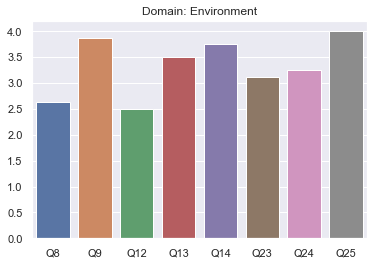

In [881]:
#Environment domain
datapoorenviron=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
#datapoorenviron[['PID','Occupational damage']]
w=d4[d4.apply(lambda x: spidpoor(x['PID']),axis=1)]
y=[w['Q8'].sum()/8, w['Q9'].sum()/8, w['Q12'].sum()/8,  w['Q13'].sum()/8,  w['Q14'].sum()/8,  w['Q23'].sum()/8, w['Q24'].sum()/8,w['Q25'].sum()/8]
x=['Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23', 'Q24', 'Q25']
sns.barplot(x=x, y=y).set(title='Domain: Environment')
plt.show()

In [882]:
#Q12)Have you enough money to meet your needs?

#Annual income graph and debts 
datagoodh.groupby('Education in year').count()

,PID,Age,Occupation,Annual Income,Marital Status,Living arrangement,Alcohol,AAO for alcohol in year,duration of use of alcohol,duration of excessive use of alcohol(in years),...,Legal complications yes/no,Describe your childhood / teenage year? Did you experience the following,Behaviour problem identified in Childhood/ Adolescence,Achievements in the Education,year of Education,Past Treatment History,Psychological factors of substances use continuation and relapse,Risk_level,AAOAGES,At what age did youstartworking?
Education in year,,,,,,,,,,,,,,,,,,,,,
7th,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8th,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9th,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
B.A,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
B.Tech,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MSC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PUC,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
PUC\nITI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
S.S.L.C,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


## Patients GOOD QOL Analysis

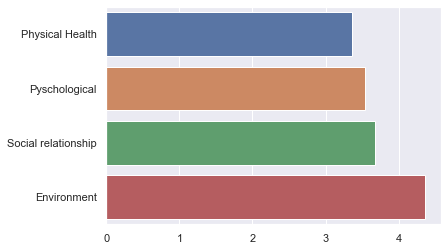

In [883]:
w=dv[dv.apply(lambda x: spidgood(x['PID']),axis=1)]
x=[w['V1'].sum()/22, w['V2'].sum()/22, w['V3'].sum()/22,  w['V4'].sum()/22]
qdnames=['Physical Health','Pyschological','Social relationship','Environment']

sns.barplot(x=x, y=qdnames)
plt.show()

[Text(0.5, 1.0, 'Age Distribution')]

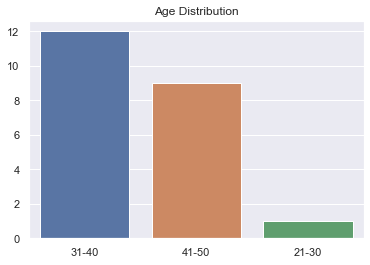

In [884]:
#age wise good patients
datagoodh=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]

datagoodh.apply(lambda x: dictages(x['Age'],4), axis=1)
def choosedict(z):
    x=[]
    y=[]
    for key in z:
        x.append(key)
        y.append(z[key])
    return x,y
     
x=choosedict(gdict)[0]
y=choosedict(gdict)[1]
sns.barplot(x=x,y=y).set(title='Age Distribution')


<AxesSubplot:xlabel='AAOAGES', ylabel='count'>

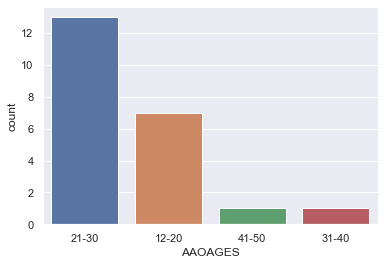

In [885]:
#aao ages good
datagoodh['AAOAGES']=datagoodh.apply(lambda x: convertages(x['AAO for alcohol in year']),axis=1)

sns.countplot(data=datagoodh,x='AAOAGES')

In [886]:
print(datagoodh.groupby('Reason for starting alcohol').count()['PID'])


Reason for starting alcohol
Other Reasons                                                                      1
Someone in family or friends were using                                           15
Someone in family or friends were using, To feel better and confident or happy     3
To avoid problems and sadness                                                      1
To feel better and confident or happy                                              2
Name: PID, dtype: int64


In [887]:
# datagoodh['duration of excessive use of alcohol(in years)']=datapoorh['duration of excessive use of alcohol(in years)'].astype(float)
# datagoodh['duration of excessive use of alcohol(in years)']


In [888]:
datagoodh['At what age did youstartworking?']=datagoodh.apply(lambda x: convertages(x['At what age did you start working?']),axis=1)

#sns.countplot(data=datagoodh,x='At what age did youstartworking?')
#print(datagoodh['At what age did youstartworking?']=datagoodh.apply(lambda x: convertages(x['At what age did you start working?']),axis=1))
datagoodh['At what age did youstartworking?']

0     12-20
6     12-20
7     12-20
16    12-20
20     None
23    12-20
26    12-20
29    21-30
37    12-20
40    12-20
41    12-20
42    21-30
45    12-20
47    12-20
48    12-20
63    12-20
64    12-20
68    12-20
72    12-20
73    12-20
74    12-20
79    21-30
Name: At what age did youstartworking?, dtype: object

In [889]:

datagoodh['Describe your childhood / teenage year? Did you experience the following']


0                        None
6                        None
7                        None
16    Poverty or severe debts
20                       None
23                       None
26                       None
29                       None
37                       None
40    Poverty or severe debts
41    Poverty or severe debts
42                       None
45                       None
47                   Violence
48                       None
63                       None
64                       None
68                       None
72    Poverty or severe debts
73    Poverty or severe debts
74    Poverty or severe debts
79    Poverty or severe debts
Name: Describe your childhood / teenage year? Did you experience the following, dtype: object

In [890]:
datagoodh.groupby('Education in year').count()['PID']


Education in year
7th         2
8th         3
9th         1
B.A         2
B.Tech      1
MSC         1
PUC         6
PUC\nITI    1
S.S.L.C     5
Name: PID, dtype: int64

In [891]:
datagoodh['How long have you been working?']=datagoodh['How long have you been working?'].astype(int)
datagoodh['How long have you been working?'].mean()


22.136363636363637

In [892]:
#For good
# def spidgood(x):
#     if x in goodlist:
#         return True
#     else:
#         return False

# datagoodh=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]


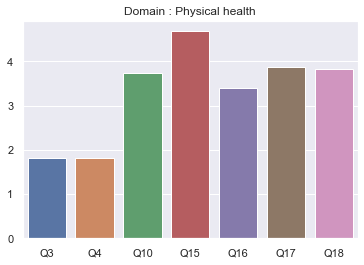

In [893]:
w=d1[d1.apply(lambda x: spidgood(x['PID']),axis=1)]
y=[w['Q3'].sum()/22, w['Q4'].sum()/22, w['Q10'].sum()/22,  w['Q15'].sum()/22,  w['Q16'].sum()/22,  w['Q17'].sum()/22,  w['Q18'].sum()/22]
x=['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18']
sns.barplot(x=x, y=y).set(title='Domain : Physical health')
plt.show()
#datagoodh[['PID','Willingness for treatment','Age','AAO for alcohol in year','duration of use of alcohol','duration of excessive use of alcohol(in years)','average units(in ml) used in last 30days','quantity of last drink(in ml)','Nicotine (yes/NO)','smoking/smokeless','Withdrawal symptoms experienced when the patient stopped','Medical Problem experienced(Past )','Medical Problem experienced(Present)','Chronic health problem','At what age did you start working?']]

#Q16.How satisfied are you with your sleep?

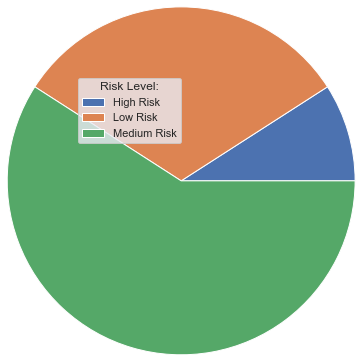

In [894]:
riskdf2=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
rislists2=riskdf2['Risk_level'].tolist()
rislists2


values=[2,7,13]
labels=['High Risk','Low Risk','Medium Risk']
plt.pie(values, radius=2)
plt.legend(labels=labels, title='Risk Level:',loc='upper left')
plt.show() 

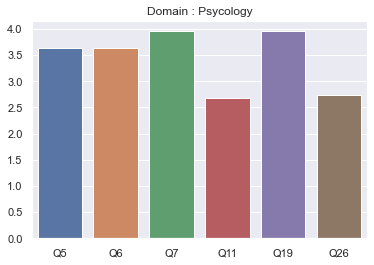

,PID,Details of Debts to be cleared. If any mention the amount,Stressors,Motivation factor,Psychiatric complication_Past,Psychiatric complication_Present,Behaviour problem identified in Childhood/ Adolescence,Psychological factors of substances use continuation and relapse
0,1,170000,Family or relationship ssues,Mild,Depression,Depression,None,No
6,7,200000,Absent,Moderate,No,No,None,No
7,8,150000,Work related stress,Moderate,No,No,None,No
16,17,150000,Absent,Moderate,No,No,"Running away from home, Scholastic Backwardness",No
20,21,No,Absent,Moderate,No,No,"Frequently physical fights and violence, Destr...",No
23,24,100000,Work related stress,Moderate,No,No,None,No
26,27,18000,Work related stress,Moderate,No,No,None,No
29,30,2600000,Absent,Moderate,Depression,Depression,None,No
37,38,No,Family or relationship issues,Mild,No,No,None,No
40,41,No,Absent,Moderate,No,No,Scholastic Backwardness,No


In [895]:
datagoodpyscho=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
#datagoodpyscho[['PID','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse','Significant Psychosocial problems']]
w=d2[d2.apply(lambda x: spidgood(x['PID']),axis=1)]
y=[w['Q5'].sum()/22, w['Q6'].sum()/22, w['Q7'].sum()/22,  w['Q11'].sum()/22,  w['Q19'].sum()/22,  w['Q26'].sum()/22]
x=['Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26']
sns.barplot(x=x, y=y).set(title='Domain : Psycology')
plt.show()
datagoodpyscho[['PID','Details of Debts to be cleared. If any mention the amount','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse']]


<AxesSubplot:>

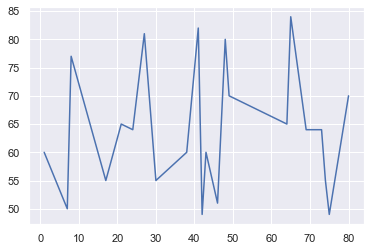

In [896]:
#Q11)Are you able to accept your bodily appearance?

# weightp=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
# weightp['Weight while admission (In Kg)']
# weightp['Height(In Ft)'].mean()
#Q12)Have you enough money to meet your needs?


weightg=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
pidw=weightg[['PID','Weight while admission (In Kg)']]
x=pidw['PID'].tolist()
y=pidw['Weight while admission (In Kg)'].tolist()
sns.lineplot(x=x,y=y)

#Annual income graph and debts 

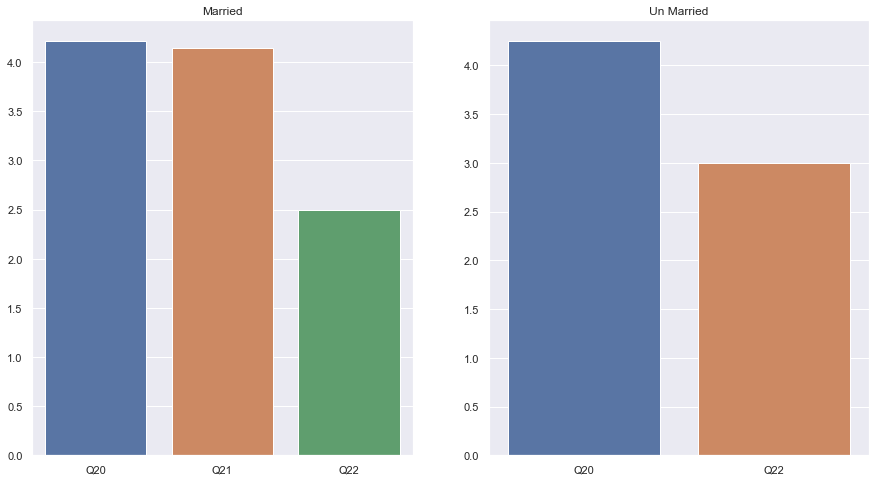

In [897]:
# datagoodsocialr=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
# #datagoodsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]
# sns.set()
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
# msdf=mdf[mdf.apply(lambda x: spidgood(x['PID']),axis=1)]
# y=[msdf['Q20'].sum()/1, msdf['Q21'].sum(), msdf['Q22'].sum()]
# x=['Q20','Q21','Q22']
# sns.barplot(x=x,y=y,ax=axes[0]).set(title='Married')
# umsdf=umdf[umdf.apply(lambda x: spidgood(x['PID']),axis=1)]
# y=[umsdf['Q20'].sum(), umsdf['Q22'].sum()]
# x=['Q20','Q22']
# sns.barplot(x=x,y=y,ax=axes[1]).set(title='Un Married')
# plt.show()


#social relationship domain
datagoodsocialr=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ml = d3[d3['Q21'].notnull()]
ml = ml['PID'].tolist()
def mldf(x):
    if x in ml:
        return True
    else:
        return False
mpdf = d3[d3.apply(lambda x: mldf(x['PID']), axis=1)]
m=mpdf
mid=m[m.apply(lambda x: spidgood(x['PID']),axis=1)]


uml = d3[d3['Q21'].isnull()]
uml = uml['PID'].tolist()
def umldf(x):
    if x in uml:
        return True
    else:
        return False
umpdf = d3[d3.apply(lambda x: umldf(x['PID']), axis=1)]
u=umpdf
umid=u[u.apply(lambda x: spidgood(x['PID']),axis=1)]


y=[mid['Q20'].sum()/14, mid['Q21'].sum()/14, mid['Q22'].sum()/14]
x=['Q20','Q21','Q22']
sns.barplot(x=x,y=y,ax=axes[0]).set(title='Married')
y=[umid['Q20'].sum()/8, umid['Q22'].sum()/8]
x=['Q20','Q22']
sns.barplot(x=x,y=y,ax=axes[1]).set(title='Un Married')
plt.show()
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]


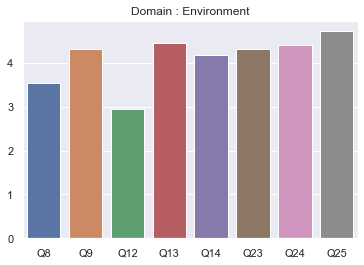

In [898]:
datagoodenviron=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
#datagoodenviron[['PID','Occupational damage']]
w=d4[d4.apply(lambda x: spidgood(x['PID']),axis=1)]
y=[w['Q8'].sum()/22, w['Q9'].sum()/22, w['Q12'].sum()/22,  w['Q13'].sum()/22,  w['Q14'].sum()/22,  w['Q23'].sum()/22, w['Q24'].sum()/22,w['Q25'].sum()/22]
x=['Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23', 'Q24', 'Q25']
sns.barplot(x=x, y=y).set(title='Domain : Environment')
plt.show()

In [899]:
#Q12)Have you enough money to meet your needs?
med=data[data.apply(lambda x: spidpoor(x['PID']),axis=1)]
med[['Annual Income','Details of Debts to be cleared. If any mention the amount']]

,Annual Income,Details of Debts to be cleared. If any mention the amount
2,50000,500000
12,120000,250000
24,150000,2000000
33,120000,50000
43,50000,20000
66,100000,120000
75,500000,180000
78,15000,125000


In [900]:
#qd.corr()

## Npg analysis

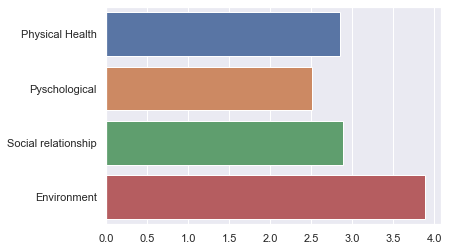

In [901]:
w=dv[dv.apply(lambda x: spidnpg(x['PID']),axis=1)]
x=[w['V1'].sum()/55, w['V2'].sum()/55, w['V3'].sum()/55,  w['V4'].sum()/55]
qdnames=['Physical Health','Pyschological','Social relationship','Environment']

sns.barplot(x=x, y=qdnames)
plt.show()

<AxesSubplot:>

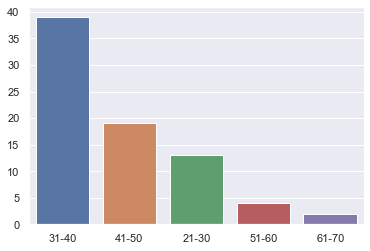

In [902]:
#npg age wise

datanpg=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]

datanpg.apply(lambda x: dictages(x['Age'],4), axis=1)

def choosedict(z):
    x=[]
    y=[]
    for key in z:
        x.append(key)
        y.append(z[key])
    return x,y
     


x=choosedict(gdict)[0]
y=choosedict(gdict)[1]
sns.barplot(x=x,y=y)

<AxesSubplot:xlabel='AAOAGES', ylabel='count'>

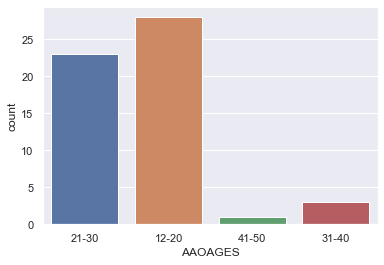

In [903]:
#man
datanpg['AAOAGES']=datanpg.apply(lambda x: convertages(x['AAO for alcohol in year']),axis=1)

sns.countplot(data=datanpg,x='AAOAGES')
#datanpg

In [904]:
print(datanpg.groupby('Reason for starting alcohol').count()['PID'])


Reason for starting alcohol
Liked the effect and wanted more of it, Craving, Felt relaxed and reduced physical exertion                       1
Someone in family or friends were using                                                                          29
Someone in family or friends were using,  To feel better and confident or happy                                   1
Someone in family or friends were using,  To feel better and confident or happy, To avoid problem and sadness     1
Someone in family or friends were using, To avoid problem and sadness                                             1
Someone in family or friends were using, To feel better and confident or happy                                    9
Someone in family or friends were using, To feel better and confident or happy, To avoid problems and sadness     3
Someone in family or friends were using, To feel better and confident or happy,To avoid problem and sadness       1
To avoid problems and sadness               

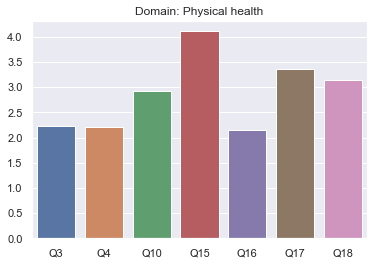

,PID,Age,Education in year,Occupation,Annual Income,Marital Status,Living arrangement,Alcohol,AAO for alcohol in year,duration of use of alcohol,...,Details of Debts to be cleared. If any mention the amount,Legal complications yes/no,Describe your childhood / teenage year? Did you experience the following,Behaviour problem identified in Childhood/ Adolescence,Achievements in the Education,year of Education,Past Treatment History,Psychological factors of substances use continuation and relapse,EDCATEGORY,Risk_level
1,2,31,S.S.L.C,Coolie,70000,No,Family,Wiskey,25,7,...,No,No,None,None,No,10,No,No,Secondary,Medium Risk
3,4,43,7th,Agricultuer,20000,Yes,Family,Wiskey,20,23,...,200000,No,None,None,No,No,No,No,Primary,Low Risk
4,5,35,7th,Coolie,60000,No,Family,Wiskey,25,10,...,40000,No,None,None,No,6,No,No,Primary,Medium Risk
5,6,45,S.S.L.C,Agricultuer,20000,Yes,Family,Wiskey,16,29,...,500000,No,None,None,No,10,No,No,Secondary,Medium Risk
8,9,32,5th,Coolie,10000,Yes,Family,Hywords,25,7,...,200000,No,None,None,No,5,No,No,Primary,Low Risk
9,10,52,S.S.L.C,Agricultuer,11000,Yes,Family,DSP Black,44,8,...,No,No,None,None,No,8,No,No,Secondary,Low Risk
10,11,41,B.A,Agricultuer,200000,Yes,Family,Wiskey,20,21,...,100000,No,None,None,No,15,No,No,Graduate,Medium Risk
11,12,51,S.S.L.C,Carpenter,11200,Yes,Family,Wiskey,26,25,...,300000,No,Poverty or severe debts,None,No,10,No,No,Secondary,Low Risk
13,14,41,PUC,Buisness,120000,Yes,Family,Wiskey,27,14,...,400000,No,Poverty or severe debts,None,No,12,No,No,PUC,Medium Risk
14,15,62,3rd,Agricultuer,15000,Yes,Family,ML,25,36,...,No,No,"Poverty or severe debts, Violence",Frequent physical fights and violence,No,4,No,No,Primary,Low Risk


In [905]:
datanpg=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]

w=d1[d1.apply(lambda x: spidnpg(x['PID']),axis=1)]
y=[w['Q3'].sum()/55, w['Q4'].sum()/55, w['Q10'].sum()/55,  w['Q15'].sum()/55,  w['Q16'].sum()/55,  w['Q17'].sum()/55,  w['Q18'].sum()/55]
x=['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18']
sns.barplot(x=x, y=y).set(title='Domain: Physical health')
plt.show()
datanpg
#To what extent do you feel that physical pain prevents you from doing what you need to do?

<AxesSubplot:>

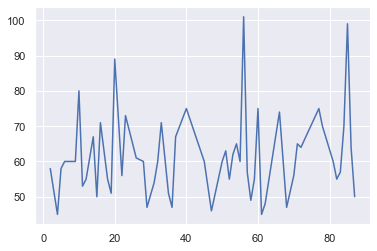

In [906]:
#Q11)Are you able to accept your bodily appearance?

# weightp=data[data.apply(lambda x: spidgood(x['PID']),axis=1)]
# weightp['Weight while admission (In Kg)']
# weightp['Height(In Ft)'].mean()
#Q12)Have you enough money to meet your needs?


weightg=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
pidw=weightg[['PID','Weight while admission (In Kg)']]
x=pidw['PID'].tolist()
y=pidw['Weight while admission (In Kg)'].tolist()
sns.lineplot(x=x,y=y)

#Annual income graph and debts 

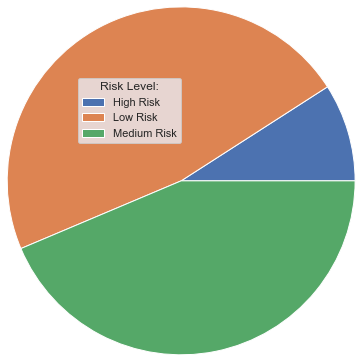

In [907]:
#Q16)How satisfied are you with your sleep?
riskdf3=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
rislists3=riskdf3['Risk_level'].tolist()

values=[5,26,24]
labels=['High Risk','Low Risk','Medium Risk']
plt.pie(values, radius=2)
plt.legend(labels=labels, title='Risk Level:',loc='upper left')
plt.show() 

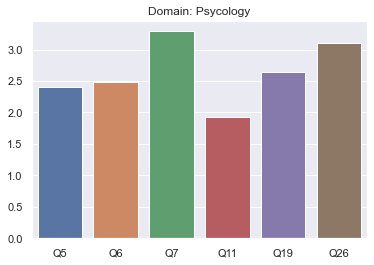

In [908]:
datapoorpyscho=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
#datapoorpyscho[['PID','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse','Significant Psychosocial problems']]
w=d2[d2.apply(lambda x: spidnpg(x['PID']),axis=1)]
y=[w['Q5'].sum()/55, w['Q6'].sum()/55, w['Q7'].sum()/55,  w['Q11'].sum()/55,  w['Q19'].sum()/55,  w['Q26'].sum()/55]
x=['Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26']
sns.barplot(x=x, y=y).set(title='Domain: Psycology')
plt.show()
#datapoorpyscho[['PID','Details of Debts to be cleared. If any mention the amount','Stressors','Motivation factor','Psychiatric complication_Past','Psychiatric complication_Present','Behaviour problem identified in Childhood/ Adolescence','Psychological factors of substances use continuation and relapse']]


<AxesSubplot:>

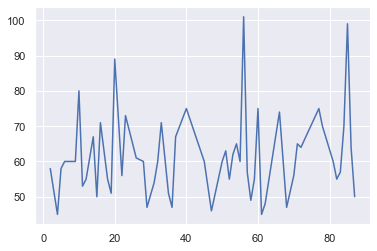

In [909]:

weightn=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
pidw=weightn[['PID','Weight while admission (In Kg)']]
x=pidw['PID'].tolist()
y=pidw['Weight while admission (In Kg)'].tolist()
sns.lineplot(x=x,y=y)


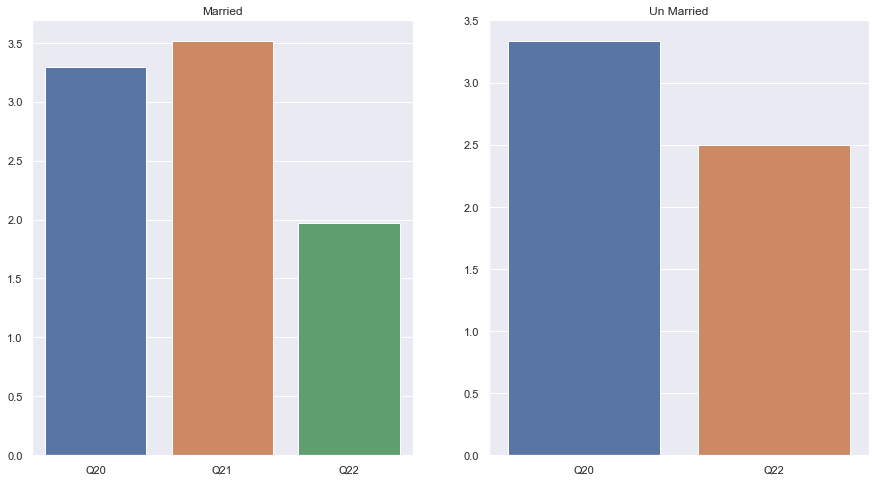

In [910]:
#social relationship domain
datapoorsocialr=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ml = d3[d3['Q21'].notnull()]
ml = ml['PID'].tolist()
def mldf(x):
    if x in ml:
        return True
    else:
        return False
mpdf = d3[d3.apply(lambda x: mldf(x['PID']), axis=1)]
m=mpdf
mid=m[m.apply(lambda x: spidnpg(x['PID']),axis=1)]


uml = d3[d3['Q21'].isnull()]
uml = uml['PID'].tolist()
def umldf(x):
    if x in uml:
        return True
    else:
        return False
umpdf = d3[d3.apply(lambda x: umldf(x['PID']), axis=1)]
u=umpdf
umid=u[u.apply(lambda x: spidnpg(x['PID']),axis=1)]



y=[mid['Q20'].sum()/37, mid['Q21'].sum()/37, mid['Q22'].sum()/37]
x=['Q20','Q21','Q22']
sns.barplot(x=x,y=y,ax=axes[0]).set(title='Married')
y=[umid['Q20'].sum()/18, umid['Q22'].sum()/18]
x=['Q20','Q22']
sns.barplot(x=x,y=y,ax=axes[1]).set(title='Un Married')
plt.show()
#datapoorsocialr[['PID','impression of Camp officer about the patient','Record extra marital experiences','If unmarried, premarital sexual encounters','Have you involved in any high risk sexual activities','At present do you have any sexual problem ( if yes mention)','multiple marriages','Have you been separated from your spouse due to your addiction','Are you suspicious of your wife','any instance of family violence']]


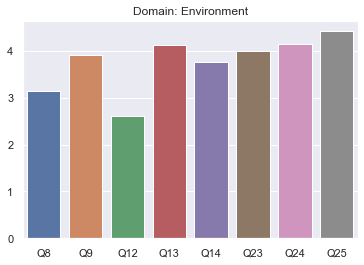

In [911]:
#Environment domain
datapoorenviron=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
#datapoorenviron[['PID','Occupational damage']]
w=d4[d4.apply(lambda x: spidnpg(x['PID']),axis=1)]
y=[w['Q8'].sum()/55, w['Q9'].sum()/55, w['Q12'].sum()/55,  w['Q13'].sum()/55,  w['Q14'].sum()/55,  w['Q23'].sum()/55, w['Q24'].sum()/55,w['Q25'].sum()/55]
x=['Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23', 'Q24', 'Q25']
sns.barplot(x=x, y=y).set(title='Domain: Environment')
plt.show()


In [912]:
#Q12)Have you enough money to meet your needs?
med=data[data.apply(lambda x: spidnpg(x['PID']),axis=1)]
med[['Annual Income','Details of Debts to be cleared. If any mention the amount']]

,Annual Income,Details of Debts to be cleared. If any mention the amount
1,70000,No
3,20000,200000
4,60000,40000
5,20000,500000
8,10000,200000
9,11000,No
10,200000,100000
11,11200,300000
13,120000,400000
14,15000,No
